## Data Visualization: World University Rankings 

Using the [World University Rankings] (https://www.topuniversities.com/university-rankings/world-university-rankings/2022) from 2017 to 2022, EDA (Exploratory Data Analysis) is performed to gain insight about the most popular universities in the world.

#### Information about the Data
QS World University Rankings is an annual publication of global university rankings by Quacquarelli Symonds. The QS ranking receives approval from the International Ranking Expert Group (IREG), and is viewed as one of the three most-widely read university rankings in the world. QS publishes its university rankings in partnership with Elsevier.

The dataset used is from [Kaggle] (https://www.kaggle.com/datasets/padhmam/qs-world-university-rankings-2017-2022). The original data was acquired by scraping the QS World University Rankings website with Python and Selenium.

#### Ranking Methodology 
The set of [indicators] (https://support.qs.com/hc/en-gb/articles/4405955370898-QS-World-University-Rankings) for the World University Ranking and their weights are:
- Academic Reputation (40%)
- Employer Reputation (10%)
- Faculty Student Ratio (20%)
- Citations per Faculty (20%)
- International Faculty Ratio (5%)
- International Student Ratio (5%)

Note: Academic Repuation and Employer Reputation are *not* included in the Kaggle dataset. 

In [26]:
# General Packages for Data Cleaning
import numpy as np 
import pandas as pd 

# Data Visualizaton
import matplotlib.pyplot as plt
import seaborn as sns

import re
sns.set_palette('pastel')

import warnings
warnings.filterwarnings("ignore")

In [27]:
data_raw = pd.read_csv('qs-world-university-rankings-2017-to-2022-V2.csv')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int64  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   logo                    6482 non-null   object 
 9   type                    6470 non-null   object 
 10  research_output         6480 non-null   object 
 11  student_faculty_ratio   6407 non-null   float64
 12  international_students  6318 non-null   object 
 13  size                    6480 non-null   object 
 14  faculty_count           6404 non-null   

### Quick Cleaning

In [28]:
# Link and logo are hyperlinks and not helpful so I'll drop them 
data_raw.drop(['link', 'logo'], axis=1, inplace=True)

In [29]:
# Identify columns with missing data
for column in data_raw.columns:
    percentage = data_raw[column].isnull().mean()
    if percentage > 0:
        print(f'{column}: {round(percentage*100, 2)}%')

rank_display: 1.05%
score: 56.49%
city: 2.75%
type: 0.19%
research_output: 0.03%
student_faculty_ratio: 1.16%
international_students: 2.53%
size: 0.03%
faculty_count: 1.2%


In [30]:
# Over half of the data in score is missing so I'll drop that column, as well. 
data_raw.drop(['score'], axis=1, inplace=True)

# The rest of the missing data is small enough (< 5%) that it can be ignored
data_raw.dropna(inplace = True)

In [31]:
# Inconsistent Data 

# rank_display
#data_raw['rank_display'].unique()
data_raw.loc[[5727]]
# Cleaning rank_display and changing the values to float 
data_raw['rank_display'] = data_raw['rank_display'].str.split('-').str[0].astype(float)

# easearch output
data_raw['research_output'].unique()
# Changing 'Very high' to 'Very High'
data_raw['research_output'] = data_raw['research_output'].replace('Very high', 'Very High')

# Removing punctation from numbers
data_raw['international_students'] = data_raw['international_students'].str.replace(',','').astype(float)
data_raw['faculty_count'] = data_raw['faculty_count'].str.replace(',','').astype(float)

# Chaning 'Latin America' to 'South America' for clarity
data_raw['region'] = data_raw['region'].str.replace('Latin America', 'South America')

data_raw.info()

# Making copy of cleaned data_raw for EDA
df = data_raw.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6081 entries, 0 to 6481
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6081 non-null   object 
 1   year                    6081 non-null   int64  
 2   rank_display            6081 non-null   float64
 3   country                 6081 non-null   object 
 4   city                    6081 non-null   object 
 5   region                  6081 non-null   object 
 6   type                    6081 non-null   object 
 7   research_output         6081 non-null   object 
 8   student_faculty_ratio   6081 non-null   float64
 9   international_students  6081 non-null   float64
 10  size                    6081 non-null   object 
 11  faculty_count           6081 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 746.6+ KB


### Data Visualization
#### Ranked Universities by Year

Text(0.5, 0.98, 'Ranked Universities by Type\n between 2017-2022')

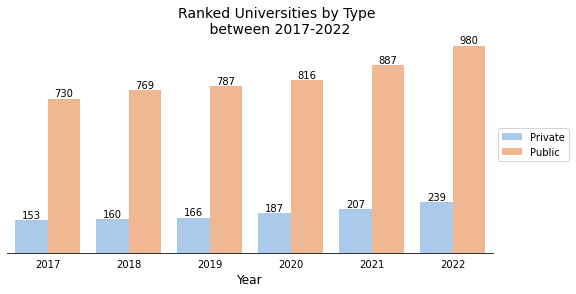

In [32]:
fig, ax = plt.subplots(figsize=(10,4))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

sns.countplot(data=df, x='year', hue = 'type')

for container in ax.containers:
    ax.bar_label(container)

fig.subplots_adjust(right=0.8)
ax.legend(loc="center left",
    bbox_to_anchor=(0.8, 0.5),
    bbox_transform=fig.transFigure)

ax.set_xlabel('Year', fontsize=12)
fig.suptitle('Ranked Universities by Type\n between 2017-2022', fontsize=14)

Since 2022, there have been almost 4 times as many public universities ranked as there are private universities.

#### Geographic Information

Text(0.5, 0.98, 'Number of Ranked Universities by Continent \n between 2017 and 2022')

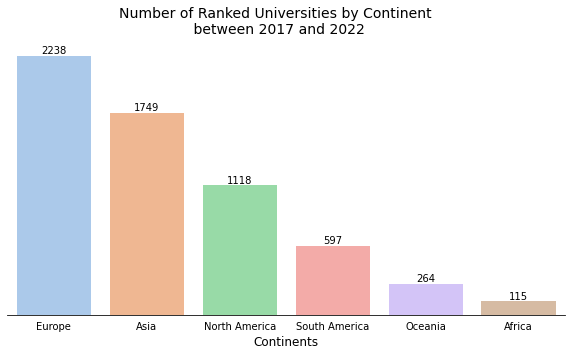

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

regions = pd.DataFrame(df['region'].value_counts().reset_index())
order = df.sort_values('region', ascending = False)

sns.barplot(x = regions['index'], 
            y=regions['region'])

ax.bar_label(ax.containers[0])

# fig.subplots_adjust(right=0.8)
# ax.legend(loc="center left",
#     bbox_to_anchor=(0.8, 0.5),
#     bbox_transform=fig.transFigure)

ax.set_xlabel('Continents', fontsize=12)
fig.suptitle('Number of Ranked Universities by Continent \n between 2017 and 2022', fontsize=14)

Europe has by far the most ranked universities, with almost 500 more than the next best, Asia. 

In [34]:
country_df= df.sort_values(by='rank_display').drop_duplicates('university')
country_df = pd.DataFrame(country_df['country'].value_counts())

country_df = country_df[:15]

Text(0.5, 1.0, 'Top 15 Countries with the Most \n Ranked Universities')

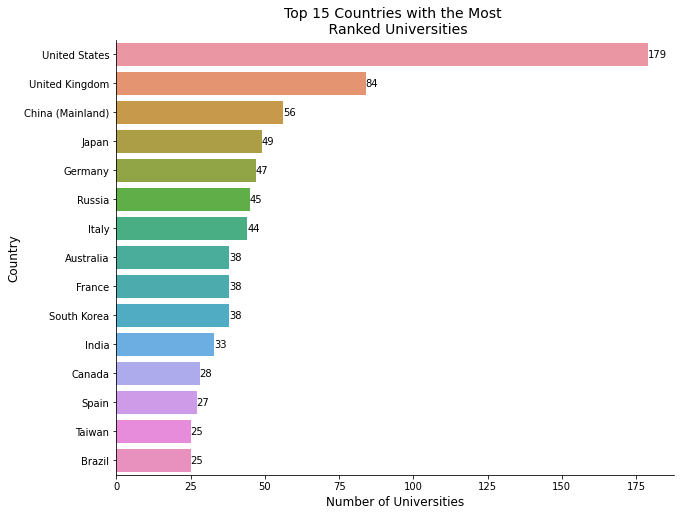

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

sns.barplot(data=country_df, x='country', y= country_df.index)

ax.bar_label(ax.containers[0])
# fig.subplots_adjust(right=0.8)
# ax.legend(loc="center left",
#     bbox_to_anchor=(0.8, 0.5),
#     bbox_transform=fig.transFigure)

plt.xlabel('Number of Universities',fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title("Top 15 Countries with the Most \n Ranked Universities", fontsize=14)

The United States has had 179 different universities ranked in the last five years. In the same time, the United Kingdom has almost half as many ranked universities - 84. China, Japan, and Germany round out the top five. 

In [36]:
city_df= df.sort_values(by='rank_display').drop_duplicates('university')
city_df = pd.DataFrame(city_df['city'].value_counts())

city_df = city_df[:15]

Text(0.5, 1.0, 'Top 15 Cities with the Most \n Ranked Universities')

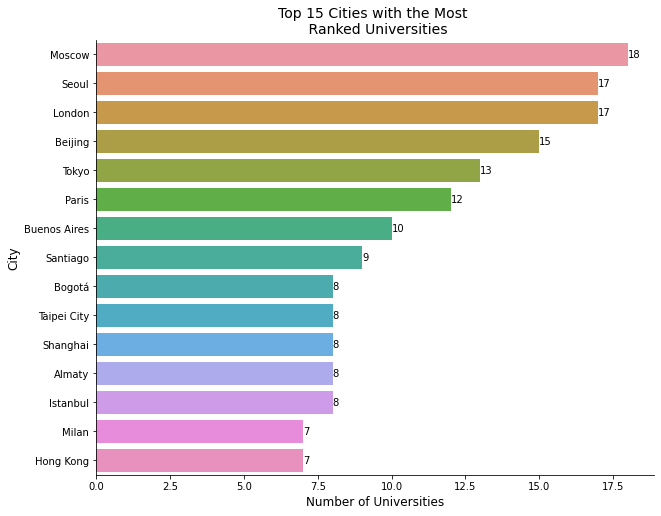

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

sns.barplot(data=city_df, x='city', y= city_df.index)

ax.bar_label(ax.containers[0])

# fig.subplots_adjust(right=0.8)
# ax.legend(loc="center left",
#     bbox_to_anchor=(0.8, 0.5),
#     bbox_transform=fig.transFigure)

plt.xlabel('Number of Universities',fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title("Top 15 Cities with the Most \n Ranked Universities", fontsize=14)

The number of ranked universities by city is much closer. Moscow has had 18 different universities ranked in the last five years, pushing the city to the top of the list by one university. Tied for a close second are Seoul and London, each with 17 universities. Beijing and Toyko round out the top five. 

It's interesting that a city in the United States is absent from the list. Even though the US has by far the most ranked universities in a country, the city with the most ranked universities, New York City, only has five. 

Furthermore, cities from the other top countries are present: London (the United Kingdom), Beijing (China), and Tokyo (Japan).

### 3. Exploratory Analysis

### Methodology
We know that we have 50% of the metrics that make up the rankings:
- Faculty Student Ratio (20%)
- Citations per Faculty (20%)
- International Faculty Ratio (5%)
- International Student Ratio (5%)
#### Faculty Student Ratio

Text(0.5, 1.0, 'Size of University Compared to Student Faculty Ratio')

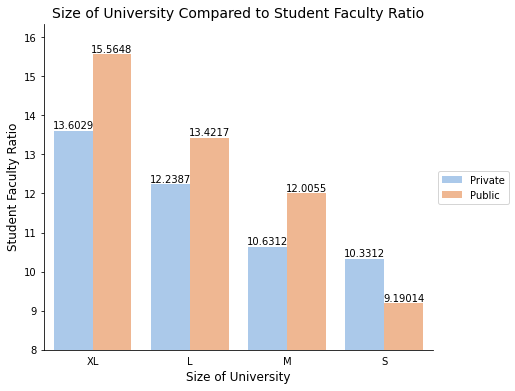

In [38]:
size_df = df.sort_values(['size'], ascending=False).reset_index(drop=True)
order= ['XL', 'L', 'M', 'S'] 
fig, ax = plt.subplots(figsize= (8,6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom=False)

sns.barplot(data = df,  x='size', y='student_faculty_ratio', 
            hue='type', order = order, ci=None)

for container in ax.containers:
    ax.bar_label(container)
    
fig.subplots_adjust(right=0.8)
ax.legend(loc="center left",
    bbox_to_anchor=(0.8, 0.5),
    bbox_transform=fig.transFigure)

ax.set(ylim=(8, None))

plt.xlabel('Size of University', fontsize=12)
plt.ylabel('Student Faculty Ratio',fontsize = 12)
plt.title('Size of University Compared to Student Faculty Ratio', fontsize = 14)

Private universities typically pride themselves on more one-on-one education, so it's expected they would have a smaller student faculty ratio. There isn't much of a change in ratio between the different sizes of private universities. 

The barchart shows that private universities have the edge in the **Faculty Student Ratio** metric, unless it is a small unverisity where public schools have a slight edge.

#### International Student and Faculty Ratio

Text(0.5, 1.0, 'Number of International Students \n by University Size')

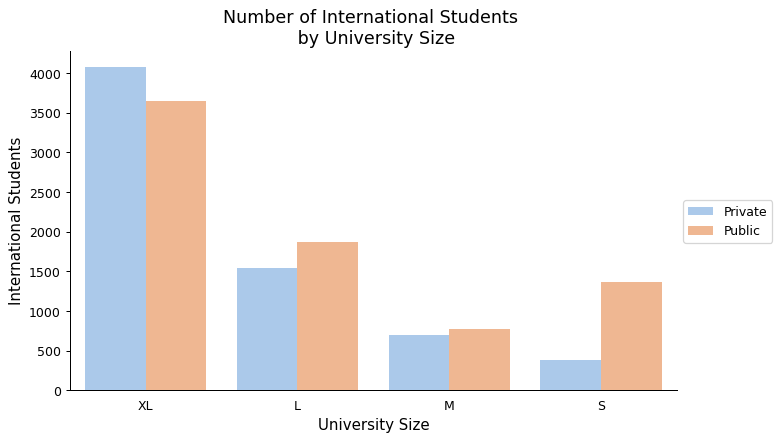

In [39]:
fig, ax = plt.subplots(figsize=(10,5), dpi=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom=False)

order= ['XL', 'L', 'M', 'S'] 

sns.barplot(data=df, x='size', y='international_students', 
            order= order, ci=None, hue='type')

fig.subplots_adjust(right=0.8)
ax.legend(loc="center left",
    bbox_to_anchor=(0.8, 0.5),
    bbox_transform=fig.transFigure)

plt.xlabel('University Size', fontsize=12)
plt.ylabel('International Students', fontsize=12)
plt.title('Number of International Students \n by University Size', fontsize=14)

When it comes to size of school, data suggests that more international students mostly prefer public universitites. Interestingly, when it comes to XL universities, more international students learn towards a private education.

Text(0.5, 1.0, 'Number of International Students Compared \n with University Research Output')

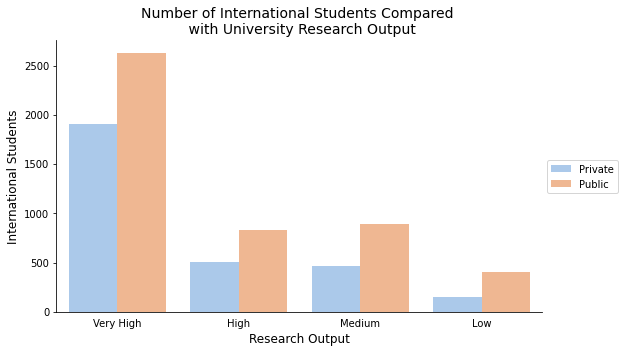

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom=False)

sns.barplot(data=df, x='research_output', y='international_students', 
            order=df['research_output'].value_counts().index, 
            ci=None, hue='type')

fig.subplots_adjust(right=0.8)
ax.legend(loc="center left",
    bbox_to_anchor=(0.8, 0.5),
    bbox_transform=fig.transFigure)

plt.xlabel('Research Output', fontsize = 12)
plt.ylabel('International Students', fontsize = 12)
plt.title('Number of International Students Compared \n with University Research Output', fontsize=14)

As a whole, international students seem to widly prefer public universities. In regard to research, international students favor universities with a Very High level of research output.

Text(0.5, 0.98, 'Countries with the Most International Students')

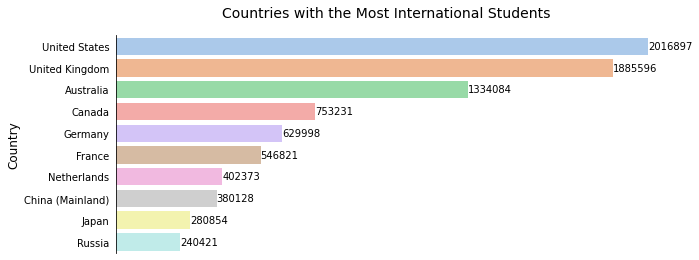

In [41]:
int_students = pd.DataFrame(df.groupby(['country'], sort=False)['international_students'].sum().sort_values(ascending=False)[:10])

fig, ax = plt.subplots(figsize=(10,4))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(left=False)
ax.get_xaxis().set_visible(False)

sns.barplot(data=int_students, x='international_students', y=int_students.index)

ax.bar_label(ax.containers[0], fmt = '%d')

ax.set_ylabel('Country', fontsize=12)
fig.suptitle('Countries with the Most International Students', fontsize=14)


#### Citations per Faculty

Text(0.5, 0.98, 'Research Output per Faculty Count by\nUniversity Type (Private or Public)')

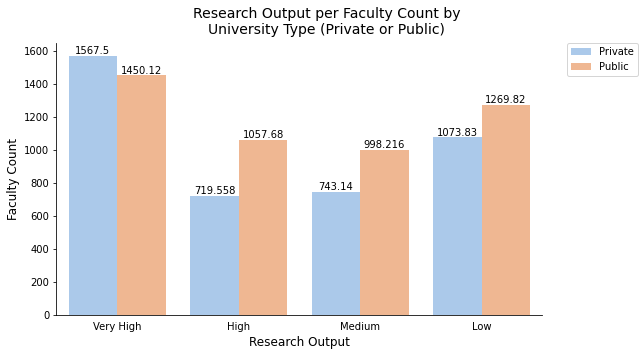

In [42]:
fig, ax = plt.subplots(figsize=(10,5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(bottom=False)

sns.barplot(data=df, x='research_output', y='faculty_count', 
            hue='type', ci=None)

for container in ax.containers:
    ax.bar_label(container)
    
fig.subplots_adjust(right=0.8)
ax.legend(loc="center left",
    bbox_to_anchor=(0.8, 0.5),
    bbox_transform=fig.transFigure)

ax.set_xlabel('Research Output', fontsize=12)
ax.set_ylabel('Faculty Count', fontsize=12)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.suptitle('Research Output per Faculty Count by\nUniversity Type (Private or Public)', fontsize=14)

It makes sense that universities with a larger number of faculty would have a higher level of research output. Interestingly, faculty count for both private and public university doesn't change much with the high and medium research levels. 

Public universities with a low research output have slightly less faculty members than those with very high research output. This might be due to university funding. A university with low funding might make staffing a priority over research. However, a university with more funding is able to give research grants to its faculty members. 

Similarily, a private universtiy with more funding is able to spend more on research facilities and faculty members with a research background.

Text(0.5, 1.0, 'Research Output Compared to University Size')

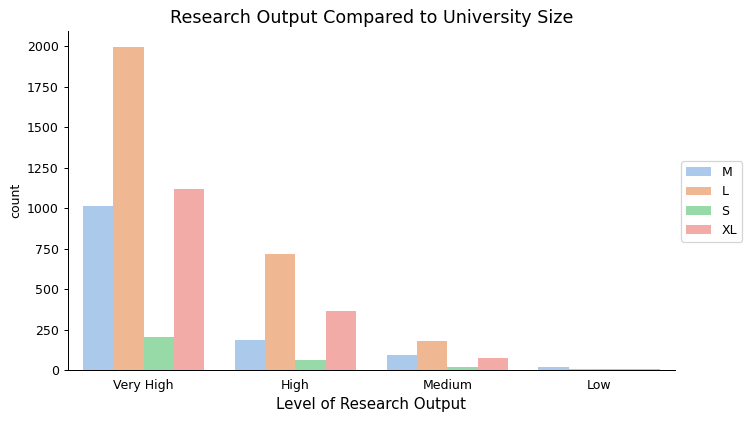

In [43]:
fig, ax = plt.subplots(figsize=(10,5), dpi=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom=False)

sns.countplot(data=df, x='research_output', hue='size')

# for container in ax.containers:
#     ax.bar_label(container)

fig.subplots_adjust(right=0.8)
ax.legend(loc="center left",
    bbox_to_anchor=(0.8, 0.5),
    bbox_transform=fig.transFigure)

plt.xlabel('Level of Research Output', fontsize=12)
plt.title('Research Output Compared to University Size', fontsize=14)

The above graph makes sense as the larger the university, the more likely the level of research output is high. 